# DATA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing research data
prep0 = pd.read_csv('https://raw.githubusercontent.com/WisnuHanif/reactor_data/main/reactor_data.csv')
prep0.head()

,Time,Running_cycle,FI-001,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,6/29/2004 4:00,1,57.376325,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,6/29/2004 4:00,2,57.415584,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,6/29/2004 4:00,3,57.454843,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,6/30/2004 0:00,4,57.543094,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,6/30/2004 0:00,5,57.470024,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151


In [3]:
#Identity variables name
prep0.columns

Index(['Time', 'Running_cycle', 'FI-001', 'FI-002', 'TC-001', 'TC-002',
       'DT-001', 'DT-002', 'DP-001', 'DP-002', 'DP-003', 'DP-004', 'PI-001',
       'PI-002', 'PI-003', 'PI-004', 'AI-001', 'AI-002', 'AI-003', 'AI-004',
       'AI-005', 'AI-006', 'AI-007', 'AI-008', 'AI-009', 'AI-010', 'RX-001',
       'TI-001', 'TI-002', 'TI-005', 'TI-006', 'TI-007', 'TI-008', 'TI-009',
       'TI-010', 'TI-011', 'TI-012', 'TI-013', 'TI-014', 'TI-015', 'TI-018',
       'TI-019', 'TI-020', 'TI-021', 'TI-022', 'TI-023', 'TI-024', 'TI-025',
       'TI-026', 'TI-027', 'TI-028', 'TI-029', 'TI-030', 'TI-031', 'TI-032',
       'TI-033', 'TI-034', 'TI-035', 'TI-036', 'TI-037', 'TI-038', 'TI-039',
       'TI-040', 'TI-041', 'TI-042', 'CONVERSION'],
      dtype='object')

# DATA PREPARATION, CLEANING, AND FEATURE EXTRACTION

In [4]:
#Removing variable description & 'NO', 'Time' column
#prep1 = prep0.iloc[1:, :].drop(['Running_cycle','Time'], axis=1)
prep1 = prep0.iloc[:, :].drop(['FI-001','Running_cycle','Time'], axis=1)
prep1

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,833.271973,323.390320,286.120880,67.911438,33.537292,20.344055,0.065580,20.184771,40.909565,70.437078,...,312.373871,301.223907,304.223450,299.636078,304.582642,300.072601,290.822022,289.512878,291.541504,94.829638
18719,832.827393,323.574768,286.037537,67.504608,33.254303,20.169985,0.066432,20.349388,40.900963,70.312330,...,312.328278,301.028229,304.057129,299.530151,304.531738,300.036346,290.642395,289.317627,291.300690,94.831773
18720,833.848450,323.598389,286.136810,67.682678,33.338257,20.028092,0.126205,20.386351,40.855808,70.336130,...,312.472900,301.012054,304.044495,299.594665,304.567383,300.047790,290.718109,289.436035,291.387756,94.878506
18721,833.529907,323.480347,286.043396,67.667175,32.947021,20.317225,0.075650,20.188131,40.896164,70.413744,...,312.350281,301.124390,304.156006,299.460388,304.473602,299.988190,290.674011,289.329468,291.345581,94.495033


In [5]:
#Convert timestamp object data to numerical
prep2 = prep1.apply(pd.to_numeric)
print(prep2.dtypes, prep2.shape)

FI-002        float64
TC-001        float64
TC-002        float64
DT-001        float64
DT-002        float64
               ...   
TI-039        float64
TI-040        float64
TI-041        float64
TI-042        float64
CONVERSION    float64
Length: 63, dtype: object (18723, 63)


In [6]:
#Check if there's missing value
prep2.isnull().sum()

FI-002        0
TC-001        0
TC-002        0
DT-001        0
DT-002        0
             ..
TI-039        0
TI-040        0
TI-041        0
TI-042        0
CONVERSION    0
Length: 63, dtype: int64

<AxesSubplot:xlabel='FI-002'>

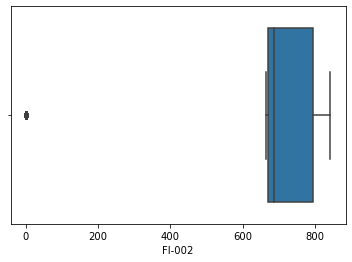

In [7]:
#Removing data where plant is not run, by identifying total raw material 'FI-001' loss flow rate
sns.boxplot(data=prep2,x=prep2['FI-002'])

In [8]:
#Remove shut down data by identifying outlier FI-001 with Inter Quantile Range Method

from numpy import percentile
# calculate interquartile range
q25_a, q75_a = percentile(prep2['FI-002'], 25), percentile(prep2['FI-002'], 75)
iqr_a = q75_a - q25_a
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_a, q75_a, iqr_a))
# calculate the outlier cutoff
cut_off_a = iqr_a * 1.5
lower_a, upper_a = q25_a - cut_off_a, q75_a + cut_off_a
print('Lower whisker=%.2f, Upper whisker=%.2f' % (lower_a, upper_a))
# identify outliers
shut_down_data = prep2[(prep2['FI-002']<lower_a)|(prep2['FI-002']>upper_a)]
print('Shut down data: %d' % len(shut_down_data))
# remove outliers
shut_down_removed = prep2[(prep2['FI-002']>lower_a)&(prep2['FI-002']<upper_a)]
print('Non-Shut down data: %d' % len(shut_down_removed))

Percentiles: 25th=670.419, 75th=794.510, IQR=124.090
Lower whisker=484.28, Upper whisker=980.65
Shut down data: 2510
Non-Shut down data: 16213


<AxesSubplot:xlabel='FI-002'>

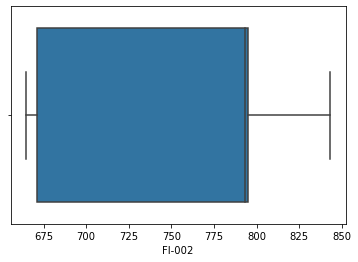

In [9]:
#Check again if there's still outlier in 'FI-001'
sns.boxplot(data=shut_down_removed, x=shut_down_removed['FI-002'])

In [10]:
prep3 = shut_down_removed
prep3.shape

(16213, 63)

In [11]:
#Remove outlier for all variables while keeps the whole row intact
lb = prep3.quantile(0.01)
ub = prep3.quantile(0.99)

prep4 = prep3[(prep3 > lb) & (prep3 < ub)]
prep4

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,833.271973,323.390320,286.120880,67.911438,33.537292,20.344055,0.065580,20.184771,40.909565,70.437078,...,312.373871,301.223907,304.223450,299.636078,304.582642,300.072601,290.822022,289.512878,291.541504,94.829638
18719,832.827393,323.574768,286.037537,67.504608,33.254303,20.169985,0.066432,20.349388,40.900963,70.312330,...,312.328278,301.028229,304.057129,299.530151,304.531738,300.036346,290.642395,289.317627,291.300690,94.831773
18720,833.848450,323.598389,286.136810,67.682678,33.338257,20.028092,0.126205,20.386351,40.855808,70.336130,...,312.472900,301.012054,304.044495,299.594665,304.567383,300.047790,290.718109,289.436035,291.387756,94.878506
18721,833.529907,323.480347,286.043396,67.667175,32.947021,20.317225,0.075650,20.188131,40.896164,70.413744,...,312.350281,301.124390,304.156006,299.460388,304.473602,299.988190,290.674011,289.329468,291.345581,94.495033


In [12]:
prep4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16213 entries, 0 to 18722
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FI-002      15887 non-null  float64
 1   TC-001      15886 non-null  float64
 2   TC-002      15887 non-null  float64
 3   DT-001      15886 non-null  float64
 4   DT-002      15888 non-null  float64
 5   DP-001      15886 non-null  float64
 6   DP-002      15816 non-null  float64
 7   DP-003      15885 non-null  float64
 8   DP-004      15886 non-null  float64
 9   PI-001      15886 non-null  float64
 10  PI-002      15886 non-null  float64
 11  PI-003      15887 non-null  float64
 12  PI-004      15887 non-null  float64
 13  AI-001      15887 non-null  float64
 14  AI-002      15887 non-null  float64
 15  AI-003      15887 non-null  float64
 16  AI-004      15887 non-null  float64
 17  AI-005      15851 non-null  float64
 18  AI-006      15887 non-null  float64
 19  AI-007      15887 non-nul

<AxesSubplot:>

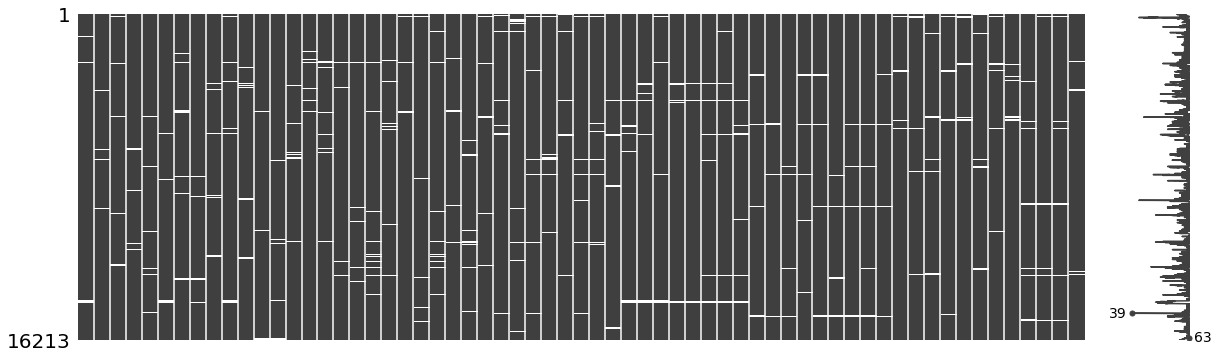

In [13]:
#Check deleted value position
import missingno as mno
mno.matrix(prep4, figsize = (20, 6))

In [14]:
#Correlation matrix between variables before missing value imputation
#corr = prep4.corr()
#corr.style.background_gradient(cmap='coolwarm')

In [15]:
#corr.values[np.triu_indices_from(corr.values,1)].sum()

In [16]:
#Fill missing value (from removed outlier) with imputer
prep5 = prep4.interpolate(method ='linear', limit_direction ='forward')
prep5.head()

,FI-002,TC-001,TC-002,DT-001,DT-002,DP-001,DP-002,DP-003,DP-004,PI-001,...,TI-034,TI-035,TI-036,TI-037,TI-038,TI-039,TI-040,TI-041,TI-042,CONVERSION
0,669.985139,319.496265,270.298088,68.159380,42.059748,16.935505,0.967330,14.547414,32.450250,63.610362,...,308.465166,293.210571,288.108362,312.395056,305.310342,303.123348,310.085243,309.464836,308.546075,93.200705
1,670.175315,319.506829,270.557335,68.149101,43.819212,16.906026,0.974280,14.532135,32.412441,63.569363,...,310.060319,294.679554,289.054518,314.409080,307.335927,304.765668,311.408695,310.634102,309.389468,93.128145
2,670.365491,319.517393,270.816583,68.138821,45.578677,16.876548,0.981229,14.516856,32.374633,63.528364,...,311.655473,296.148536,290.000675,316.423104,309.361511,306.407989,312.732147,311.803369,310.232862,93.055586
3,670.622632,319.553869,271.363961,68.380253,49.568133,16.811533,1.000760,14.494793,32.307087,63.432052,...,315.280320,299.371886,292.082630,320.951668,313.762146,309.971053,315.635902,314.406282,312.107740,92.830864
4,670.828064,319.515243,270.964477,67.735901,45.934814,16.879419,0.977966,14.471894,32.329281,63.531145,...,312.047943,296.581512,290.251892,316.915100,309.949554,306.832458,313.039825,312.000702,310.427032,93.200151


In [17]:
prep5.isnull().sum()

FI-002        0
TC-001        0
TC-002        0
DT-001        0
DT-002        0
             ..
TI-039        0
TI-040        0
TI-041        0
TI-042        0
CONVERSION    0
Length: 63, dtype: int64

In [19]:
prep5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FI-002,16213.0,746.679192,68.974394,668.778687,671.182739,793.192139,794.781494,836.910889
TC-001,16213.0,322.950928,5.226784,312.015381,319.500427,322.585754,326.562042,334.638306
TC-002,16213.0,278.760113,6.484141,266.984192,273.608520,278.874756,284.130310,292.542786
DT-001,16213.0,66.416289,6.934921,51.402039,62.645111,67.749573,71.104828,80.546149
DT-002,16213.0,37.237985,11.090657,22.402069,28.286957,34.591809,43.110779,69.457214
...,...,...,...,...,...,...,...,...
TI-039,16213.0,304.102563,7.659816,288.000122,298.397888,304.587952,309.892517,320.615326
TI-040,16213.0,305.790454,14.960208,278.586883,291.905914,307.346619,316.723419,336.157837
TI-041,16213.0,307.477383,14.811054,281.091980,294.418945,307.079346,319.622864,336.463501
TI-042,16213.0,304.674310,16.186075,277.008789,290.616974,303.848419,318.172211,335.618439


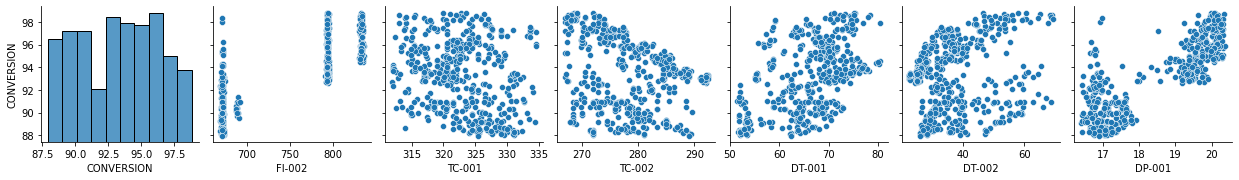

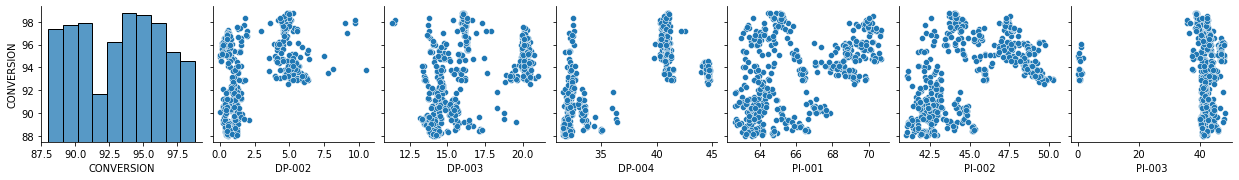

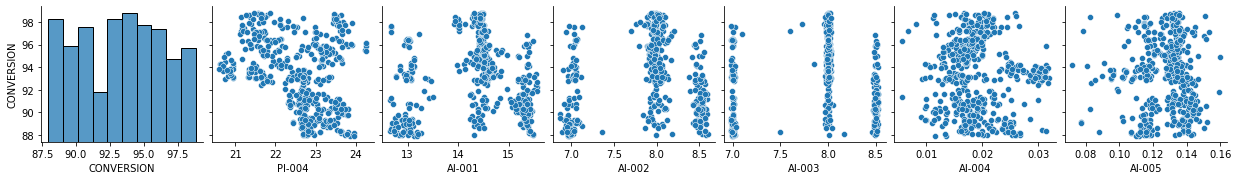

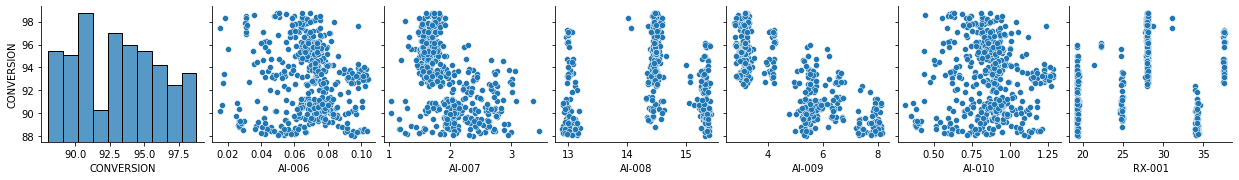

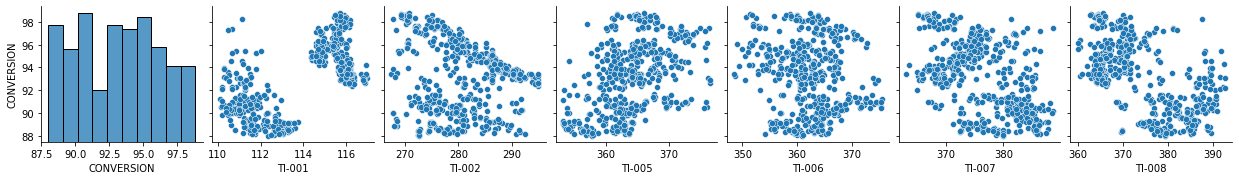

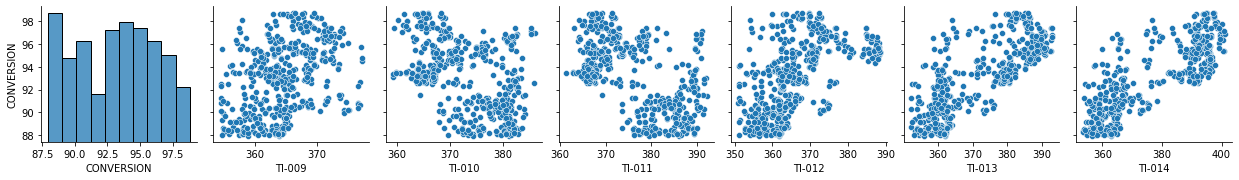

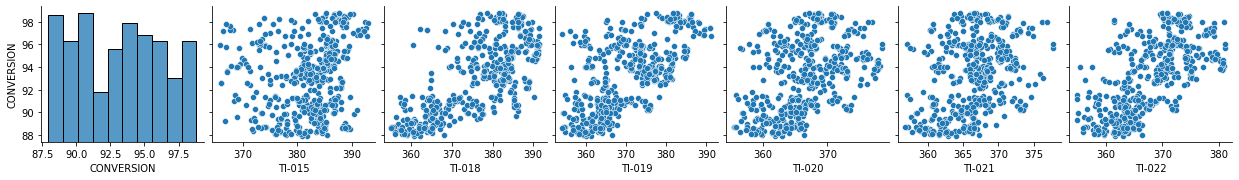

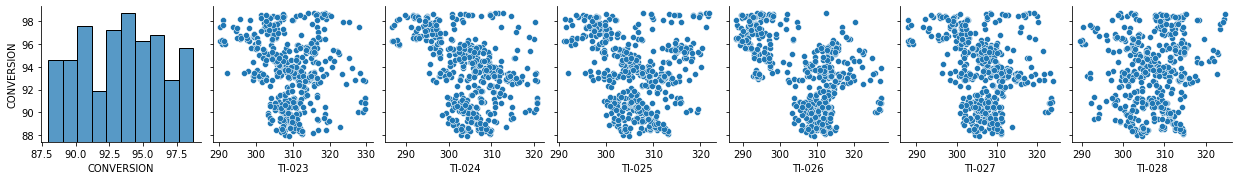

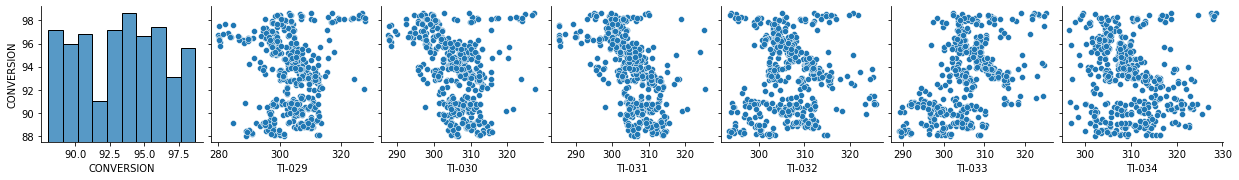

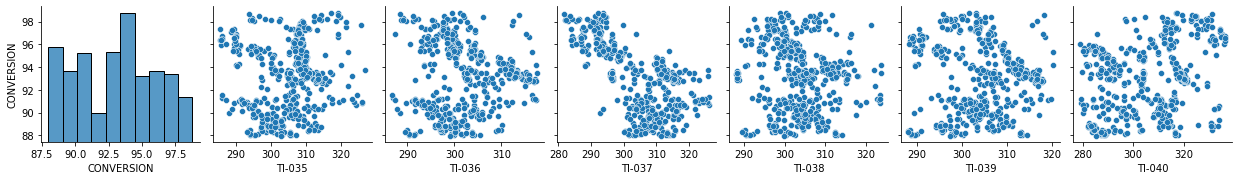

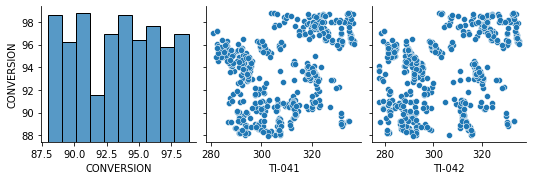

In [20]:
#Pairplot each predictor to target
sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','FI-002', 'TC-001', 'TC-002','DT-001', 'DT-002','DP-001'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','DP-002', 'DP-003', 'DP-004', 'PI-001','PI-002', 'PI-003'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'PI-004', 'AI-001', 'AI-002','AI-003', 'AI-004','AI-005'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'AI-006', 'AI-007','AI-008', 'AI-009', 'AI-010', 'RX-001'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-001','TI-002','TI-005', 'TI-006', 'TI-007', 'TI-008'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-009','TI-010', 'TI-011', 'TI-012', 'TI-013','TI-014'],
    y_vars = ['CONVERSION'])
    
sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-015', 'TI-018','TI-019', 'TI-020', 'TI-021', 'TI-022'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-023', 'TI-024', 'TI-025', 'TI-026', 'TI-027', 'TI-028'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION', 'TI-029', 'TI-030', 'TI-031', 'TI-032','TI-033', 'TI-034'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-035', 'TI-036', 'TI-037', 'TI-038', 'TI-039','TI-040'],
    y_vars = ['CONVERSION'])

sns.pairplot(prep5.sample(500),
    x_vars = ['CONVERSION','TI-041', 'TI-042'],
    y_vars = ['CONVERSION'])

In [21]:
#Correlation matrix after data imputation
corr2 = prep5.corr()
corr2.style.background_gradient(cmap='coolwarm')

In [22]:
# Pearson correlation coefficient
select_corr = prep5.corr()["CONVERSION"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(select_corr)

# random threshold for features to keep
selected_features = abs_corr[abs_corr>0.4]
selected_features

DP-001    0.807746
FI-002    0.806157
TI-014    0.795037
TI-013    0.764606
TI-018    0.700174
DP-004    0.675512
TI-001    0.667385
TI-019    0.647600
TI-022    0.644449
DT-001    0.544135
TI-012    0.542178
DP-002    0.530594
PI-002    0.473997
TI-005    0.472168
TI-020    0.465437
PI-001    0.430794
TI-024    0.408135
AI-007    0.462468
TI-010    0.487901
TI-007    0.495802
TI-031    0.504460
TI-026    0.542696
TI-011    0.582506
TI-008    0.608041
TI-037    0.676970
AI-009    0.797870
Name: CONVERSION, dtype: float64

In [23]:
len(selected_features)

26

In [24]:
# Drop low correlation features
prep6 = prep5[selected_features.index].interpolate(method ='linear', limit_direction ='backward')
prep6.isnull().sum()

DP-001    0
FI-002    0
TI-014    0
TI-013    0
TI-018    0
DP-004    0
TI-001    0
TI-019    0
TI-022    0
DT-001    0
TI-012    0
DP-002    0
PI-002    0
TI-005    0
TI-020    0
PI-001    0
TI-024    0
AI-007    0
TI-010    0
TI-007    0
TI-031    0
TI-026    0
TI-011    0
TI-008    0
TI-037    0
AI-009    0
dtype: int64

In [25]:
y_lasso = prep5["CONVERSION"]
X_lasso = prep6

In [26]:
#remove collinearity by removing irrelavant features with ebbedded method
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_lasso, y_lasso)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_lassPo,y_lasso))
coef = pd.Series(reg.coef_, index = X_lasso.columns)

Best alpha using built-in LassoCV: 0.170252
Best score using built-in LassoCV: 0.914529


In [27]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 12 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

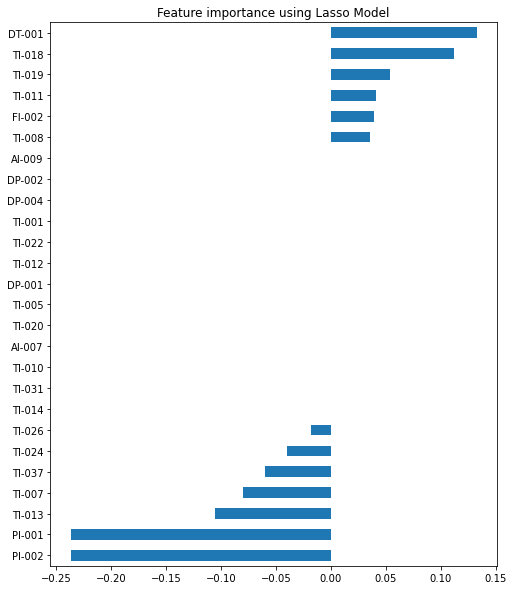

In [28]:
#Visualize important feature
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [29]:
#Select relevant reatures
abs_coef = abs(coef)
relevant_features = abs_coef[abs_coef>0]
prep7 = prep6[relevant_features.index].sort_index(axis=1, ascending=True)
prep7['CONVERSION'] = prep5["CONVERSION"]
prep7.shape

(16213, 15)

Text(0.5, 1.0, 'Feature importance using Lasso Model')

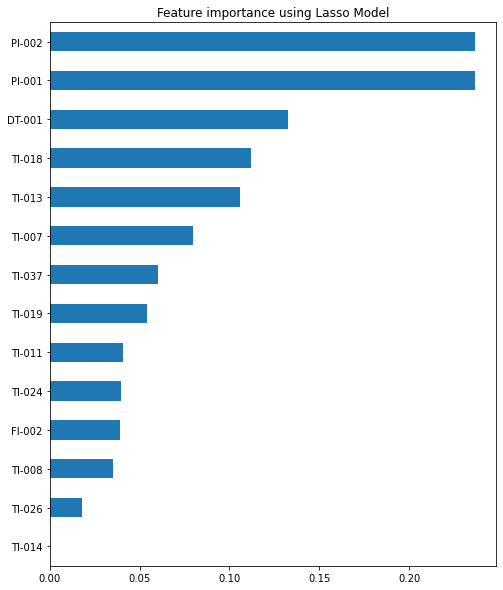

In [535]:
#Showing barplot of absolut relevant features
imp_feat = abs_coef[abs_coef>0].sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_feat.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [30]:
#Showing correlation between relevant features
corr3 = prep7.corr().style.background_gradient(cmap='coolwarm')
corr3

,DT-001,FI-002,PI-001,PI-002,TI-007,TI-008,TI-011,TI-013,TI-014,TI-018,TI-019,TI-024,TI-026,TI-037,CONVERSION
DT-001,1.000000,0.530917,0.536242,0.590392,-0.220331,-0.330181,-0.304564,0.570736,0.655155,0.457136,0.534459,0.131472,-0.007558,-0.095858,0.544135
FI-002,0.530917,1.000000,0.757240,0.810297,-0.613811,-0.828346,-0.809575,0.894242,0.928547,0.648715,0.696366,-0.336182,-0.473703,-0.585382,0.806157
PI-001,0.536242,0.757240,1.000000,0.900401,-0.400631,-0.563919,-0.587717,0.675045,0.723003,0.503509,0.677317,-0.043757,-0.198516,-0.161847,0.430794
PI-002,0.590392,0.810297,0.900401,1.000000,-0.515149,-0.664529,-0.686526,0.704911,0.794443,0.552277,0.600037,0.015895,-0.136252,-0.156943,0.473997
TI-007,-0.220331,-0.613811,-0.400631,-0.515149,1.000000,0.890747,0.923425,-0.449534,-0.568692,-0.295453,-0.446681,0.195842,0.328890,0.321625,-0.495802
TI-008,-0.330181,-0.828346,-0.563919,-0.664529,0.890747,1.000000,0.970876,-0.680916,-0.745192,-0.363761,-0.555022,0.317664,0.445296,0.509761,-0.608041
TI-011,-0.304564,-0.809575,-0.587717,-0.686526,0.923425,0.970876,1.000000,-0.656878,-0.746209,-0.382853,-0.574873,0.301791,0.439899,0.434712,-0.582506
TI-013,0.570736,0.894242,0.675045,0.704911,-0.449534,-0.680916,-0.656878,1.000000,0.951442,0.776774,0.820255,-0.313642,-0.411096,-0.512801,0.764606
TI-014,0.655155,0.928547,0.723003,0.794443,-0.568692,-0.745192,-0.746209,0.951442,1.000000,0.753594,0.837807,-0.239809,-0.421866,-0.462951,0.795037
TI-018,0.457136,0.648715,0.503509,0.552277,-0.295453,-0.363761,-0.382853,0.776774,0.753594,1.000000,0.664925,-0.066859,-0.170202,-0.315168,0.700174


In [31]:
#Drop high correlation variables among predictor
prep7 = prep7.drop(['TI-007','TI-011', 'TI-014'], axis = 1)

In [32]:
#Data Scaling with normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled_data = pd.DataFrame(scaler.fit_transform(prep7), columns = prep7.columns)
print(scaled_data)

         DT-001    FI-002    PI-001    PI-002    TI-008    TI-013    TI-018  \
0      0.574982  0.007176  0.120962  0.147141  0.575141  0.735253  0.883409   
1      0.574629  0.008307  0.115958  0.146459  0.575560  0.734086  0.884024   
2      0.574277  0.009438  0.110954  0.145777  0.575979  0.732919  0.884639   
3      0.582561  0.010967  0.099198  0.145072  0.579790  0.736815  0.891658   
4      0.560452  0.012189  0.111293  0.142082  0.571996  0.723499  0.876856   
...         ...       ...       ...       ...       ...       ...       ...   
16208  0.566475  0.978357  0.954216  0.794969  0.179845  0.874595  0.963500   
16209  0.552515  0.975713  0.938989  0.804208  0.175965  0.861797  0.956294   
16210  0.558625  0.981786  0.941894  0.821784  0.183965  0.868358  0.961819   
16211  0.558093  0.979891  0.951368  0.794546  0.172740  0.865363  0.958485   
16212  0.558093  0.979891  0.951368  0.794546  0.172740  0.865363  0.958485   

         TI-019    TI-024    TI-026    TI-037  CONV

In [33]:
scaled_data.describe()

,DT-001,FI-002,PI-001,PI-002,TI-008,TI-013,TI-018,TI-019,TI-024,TI-026,TI-037,CONVERSION
count,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000,16213.000000
mean,0.515173,0.463329,0.433199,0.440587,0.448470,0.503894,0.607074,0.444170,0.521960,0.469764,0.482083,0.491219
std,0.237953,0.410239,0.301024,0.284654,0.268006,0.292610,0.270313,0.253621,0.191360,0.230721,0.242921,0.281156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385775,0.014299,0.158281,0.176755,0.201664,0.227581,0.377764,0.250587,0.409749,0.247344,0.262745,0.235998
50%,0.560921,0.739974,0.349540,0.385582,0.359732,0.550594,0.692458,0.409205,0.533446,0.531321,0.510281,0.510707
75%,0.676047,0.749427,0.745518,0.700792,0.681762,0.760995,0.810577,0.640118,0.655715,0.629338,0.680016,0.717906
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
#Select data for predictors and target

#Import the features
X_df = scaled_data.drop('CONVERSION', axis = 1)
X = scaled_data.drop('CONVERSION', axis = 1).values.astype(float).reshape(-1, len(scaled_data.columns)-1)

# Extract the target
y_df = scaled_data['CONVERSION']
y = scaled_data['CONVERSION'].values.astype(float)

print(X.shape, y.shape)

(16213, 11) (16213,)


In [35]:
#Create function to return conversion scale for later use
def return_conversion_scale(variable_plot):
    minimum = min(prep7['CONVERSION'])
    maximum = max(prep7['CONVERSION'])
    return ((variable_plot - min(variable_plot)) /(max(variable_plot) - min(variable_plot)))*(maximum-minimum)+minimum

Observations: 16213
Training Observations: 13781
Testing Observations: 2432


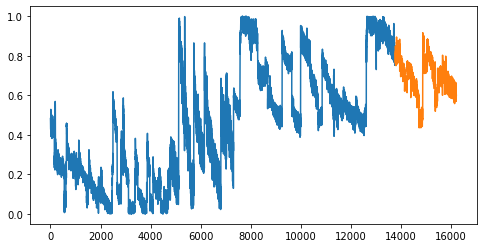

In [36]:
#Divide data into training 70%, validation 15% and testing 15%
#In this first step, we will divide data which will be used to train the model and as prediction
#1st splitting : training (85%); testing (15%)
y_tr_size = int(len(y) * 0.85)
y_tr, y_test = y[0:y_tr_size], y[y_tr_size:len(y)]
X_tr_size = int(len(X) * 0.85)
X_tr, X_test = X[0:X_tr_size], X[X_tr_size:len(X)]
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(y_tr)))
print('Testing Observations: %d' % (len(y_test)))
plt.subplots(figsize=(8,4))
plt.plot(y_tr)
plt.plot([None for i in y_tr] + [X for X in y_test])
plt.show()

In [37]:
print('Training Features Shape:', X_tr.shape)
print('Training Targets Shape:', X_test.shape)
print('Testing Features Shape:', y_tr.shape)
print('Testing Targets Shape:', y_test.shape)

Training Features Shape: (13781, 11)
Training Targets Shape: (2432, 11)
Testing Features Shape: (13781,)
Testing Targets Shape: (2432,)


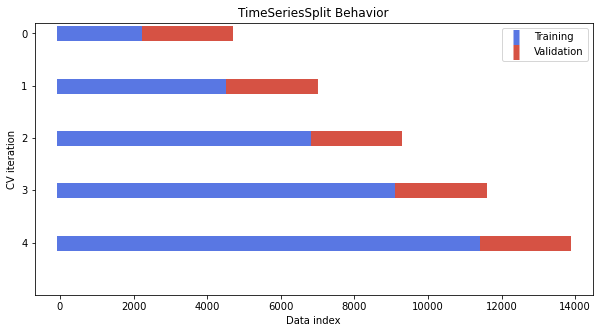

In [38]:
#Import and initialize the cross-validation iterator
#In the second step, we split training data from 1st step into training (80%); validation (20%)
from sklearn.model_selection import TimeSeriesSplit

n_splits = 5
ts_split = TimeSeriesSplit(n_splits)

fig, ax = plt.subplots(figsize=(10,5))
for ii, (tr, tt) in enumerate(ts_split.split(X_tr, y_tr)):
    
    #Plot training and testing indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)],
                    marker='_', lw=15)
    l2 = ax.scatter(tt, [ii] * len(tt), c=[plt.cm.coolwarm(.9)],
                    marker='_', lw=15)
    ax.set(ylim=[n_splits, -.2], yticks=np.arange(n_splits), title='TimeSeriesSplit Behavior', xlabel='Data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

In [39]:
for train_index, test_index in ts_split.split(X_tr, y_tr):
     print("TRAIN:", train_index, "TEST:", test_index)

     #To get the indices 
     X_train, X_val = X_tr[train_index], X_tr[test_index]
     y_train, y_val = y_tr[train_index], y_tr[test_index]

TRAIN: [   0    1    2 ... 2298 2299 2300] TEST: [2301 2302 2303 ... 4594 4595 4596]
TRAIN: [   0    1    2 ... 4594 4595 4596] TEST: [4597 4598 4599 ... 6890 6891 6892]
TRAIN: [   0    1    2 ... 6890 6891 6892] TEST: [6893 6894 6895 ... 9186 9187 9188]
TRAIN: [   0    1    2 ... 9186 9187 9188] TEST: [ 9189  9190  9191 ... 11482 11483 11484]
TRAIN: [    0     1     2 ... 11482 11483 11484] TEST: [11485 11486 11487 ... 13778 13779 13780]


In [40]:
print('Training Features Shape:', X_train.shape)
print('Training Targets Shape:', y_train.shape)
print('Validation Features Shape:', X_val.shape)
print('Validation Targets Shape:', y_val.shape)

Training Features Shape: (11485, 11)
Training Targets Shape: (11485,)
Validation Features Shape: (2296, 11)
Validation Targets Shape: (2296,)


In [41]:
#Measurement metrics for inverted scale
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from math import log
    
def model_metrics(actual, predict):
    ac = return_conversion_scale(actual)
    pr = return_conversion_scale(predict)
    print('Mean Absolute Error:', metrics.mean_absolute_error(ac, pr))
    print('Mean Squared Error:', metrics.mean_squared_error(ac, pr))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ac, pr)))
    print('Coefficient of Determination:', r2_score(ac, pr)) 
    
    # calculate aic for regression
    lr_model = LinearRegression()
    lr_model.fit(pr.reshape(-1, 1), ac.reshape(-1, 1))
    # number of parameters
    num_params = len(lr_model.coef_) + 1
    # predict the training set
    yhat = lr_model.predict(pr.reshape(-1, 1))
    # calculate the error
    mse = metrics.mean_squared_error(ac, yhat)
    # calculate the aic
    aic = len(ac) * log(mse) + 2 * num_params
    print('Akaike Information Criterion: %.3f' % aic)
    
    # calculate bic for regression
    bic = len(ac) * log(mse) + num_params * log(len(ac))
    print('Bayesian Information Criterion: %.3f' % bic)

# MACHINE LEARNING MODEL : RANDOM FORREST REGRESSION

In [447]:
feature_list = list(X_df.columns)
feature_names = X_df.columns

In [448]:
#Run Ramdom Forest Regressor without hyper parameter tuning (default)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, oob_score = True)
regressor.fit(X_train, y_train) # change this

RandomForestRegressor(oob_score=True)

In [452]:
#Generate Regressor score and OOB Score of the model
print("\nRegressor Score " + str(regressor.score(X_train, y_train)), "\nOOB Score " + str(regressor.oob_score_))


Regressor Score 0.9975943580923614 
OOB Score 0.9826186148589466


In [453]:
rfr_model_pred = regressor.predict(X_val)
rfr_model_pred

array([0.476739  , 0.56925466, 0.57816317, ..., 0.84990742, 0.8461045 ,
       0.85437242])

In [454]:
# evaluate predictions for base model
model_metrics(y_val, rfr_model_pred)

Mean Absolute Error: 0.5732905941698013
Mean Squared Error: 0.7901728977308664
Root Mean Squared Error: 0.8889166989830185
Coefficient of Determination: 0.943103704297625
Akaike Information Criterion: -664.845
Bayesian Information Criterion: -653.367


<Figure size 640x480 with 0 Axes>

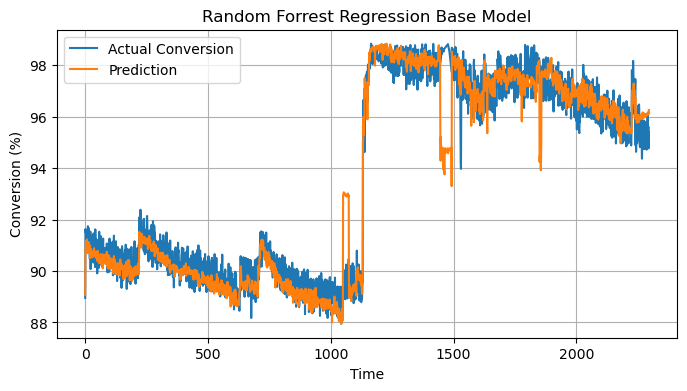

In [456]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(8,4))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(rfr_model_pred), label = "Prediction")
    plt.grid()
    plt.title('Random Forrest Regression Base Model')
    plt.xlabel('Time')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [457]:
#Showing feature importance based on random forrest
fi = pd.DataFrame({'feature': feature_list,
                   'importance': regressor.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
1,FI-002,0.609052
10,TI-037,0.110592
6,TI-018,0.105507
0,DT-001,0.070523
3,PI-002,0.020269
8,TI-024,0.017518
2,PI-001,0.016899
9,TI-026,0.016170
5,TI-013,0.014066
4,TI-008,0.012170


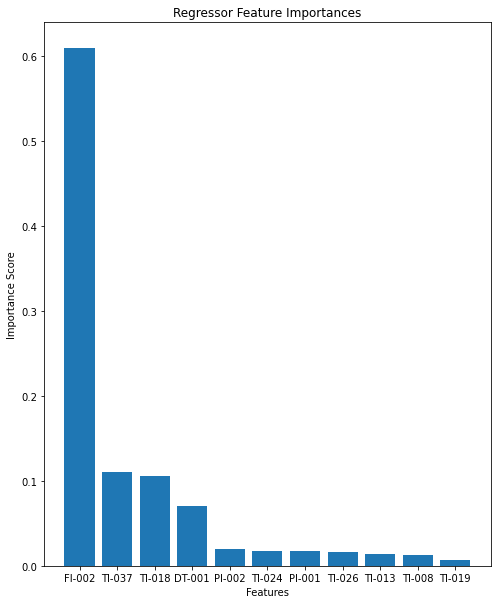

In [462]:
plt.bar(fi['feature'], fi['importance'])
plt.title('Regressor Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [463]:
#Random Search with Cross Validation
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 39)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True, False]}


In [464]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_squared_error', 
                              cv = ts_split, verbose=2, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.9min finished


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [10, 15, 20, 25, 30, 35,
                                                         40, 45, 50, 55, 60, 65,
                                                         70, 75, 80, 85, 90, 95,
                     

In [465]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [466]:
rf_random.cv_results_

{'mean_fit_time': array([ 2.64195738, 16.36022434,  5.56759367,  4.64651008,  5.74988017,
         6.13292122,  7.86556263,  2.64375415, 11.47731428, 10.40677652,
        11.86547637, 14.9376749 , 10.48032079,  2.05226569,  2.69645042,
         5.53874836,  1.1328783 ,  3.27898545, 21.8608747 , 11.05819955,
         1.06440892, 12.73875585, 15.9808042 ,  8.8545197 ,  4.94514713,
         2.48201647,  1.22634964,  2.57394013,  9.74982438,  7.01185675,
         7.45547633,  9.3506784 ,  4.63328485, 12.39669461, 23.22242293,
         2.18819985,  3.79880314,  1.7963964 ,  4.31087418,  9.36323462,
         5.63539481,  1.044732  , 19.3268414 ,  4.41082916,  4.51034126,
         2.81088367, 10.97190928,  3.98457532,  0.63322229,  1.42707825,
         6.21771822,  1.0403933 ,  8.44427958,  7.1130147 ,  6.41325364,
         2.04413447, 17.95081725,  4.60531387,  8.01013594,  6.78995113,
        13.86612797,  9.96335945,  5.25659595,  4.67951484,  6.86632838,
         3.31213765,  2.79373055, 

In [467]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      min_samples_leaf=3, min_samples_split=10,
                      n_estimators=15)

In [468]:
best_random = rf_random.best_estimator_
best_pred = best_random.predict(X_val)
best_pred

array([0.47479749, 0.57328932, 0.57327176, ..., 0.81397421, 0.8095714 ,
       0.81041533])

In [469]:
#Evaluate the Best Random Search Model

model_metrics(y_val, best_pred)

Mean Absolute Error: 0.5178643134177522
Mean Squared Error: 0.6143796482074927
Root Mean Squared Error: 0.7838237354198281
Coefficient of Determination: 0.955761674136993
Akaike Information Criterion: -1224.799
Bayesian Information Criterion: -1213.321


<Figure size 640x480 with 0 Axes>

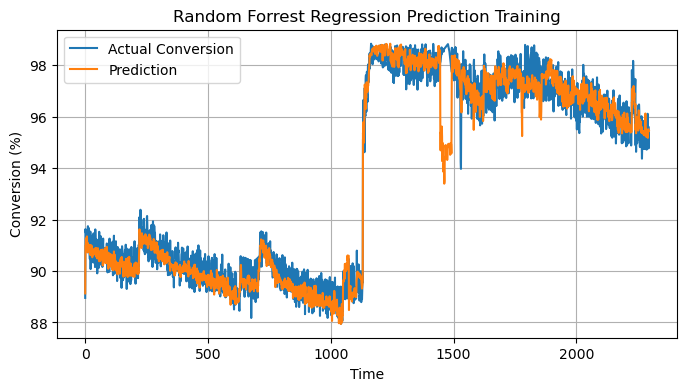

In [470]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(8,4))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(best_pred), label = "Prediction")
    plt.grid()
    plt.title('Random Forrest Regression Prediction Training')
    plt.xlabel('Time')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [478]:
#Training Curves
from sklearn.model_selection import GridSearchCV
tree_grid = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 39)]}

# Create the grid search model and fit to the training data
tree_grid_search = GridSearchCV(best_random, param_grid=tree_grid, verbose = 3, n_jobs=-1, cv = ts_split,
                                return_train_score=True, scoring = 'neg_mean_absolute_error')
tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:  4.0min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=RandomForestRegressor(bootstrap=False, max_depth=60,
                                             max_features='sqrt',
                                             min_samples_leaf=3,
                                             min_samples_split=10,
                                             n_estimators=15),
             n_jobs=-1,
             param_grid={'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145, 150, 155, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=3)

In [479]:
tree_grid_search.best_params_

{'n_estimators': 40}

In [480]:
train_scores = pd.DataFrame(tree_grid_search.cv_results_)
train_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.453387,0.243580,0.004389,0.000489,10,{'n_estimators': 10},-0.081682,-0.135459,-0.145824,-0.126782,...,-0.118379,0.023348,12,-0.007816,-0.007886,-0.010473,-0.012523,-0.011895,-0.010118,0.001967
1,0.658639,0.334647,0.005784,0.000399,15,{'n_estimators': 15},-0.079753,-0.124813,-0.156620,-0.156996,...,-0.124030,0.030321,37,-0.007388,-0.007718,-0.010152,-0.012291,-0.011745,-0.009859,0.002013
2,0.852920,0.447228,0.007380,0.000798,20,{'n_estimators': 20},-0.087211,-0.136230,-0.164294,-0.091550,...,-0.117550,0.029027,6,-0.007386,-0.007471,-0.010107,-0.011887,-0.011412,-0.009652,0.001908
3,1.104247,0.575208,0.009176,0.001716,25,{'n_estimators': 25},-0.086143,-0.130293,-0.146349,-0.118873,...,-0.120673,0.019740,27,-0.007428,-0.007461,-0.009993,-0.011958,-0.011432,-0.009655,0.001916
4,1.313089,0.694291,0.009774,0.000399,30,{'n_estimators': 30},-0.090339,-0.125115,-0.152843,-0.122391,...,-0.120364,0.020339,21,-0.007333,-0.007373,-0.009922,-0.011813,-0.011315,-0.009551,0.001899


In [494]:
def plot_results(model, param = 'n_estimators', name = 'n_trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.ylim(ymin = -0.2,  ymax = 0.05)
    plt.legend()
    plt.grid()
    plt.xlabel(name)
    plt.ylabel('Neg Mean Absolute Error')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = 0.0, ymax = 10.0)
    plt.grid()
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    plt.tight_layout(pad = 4)

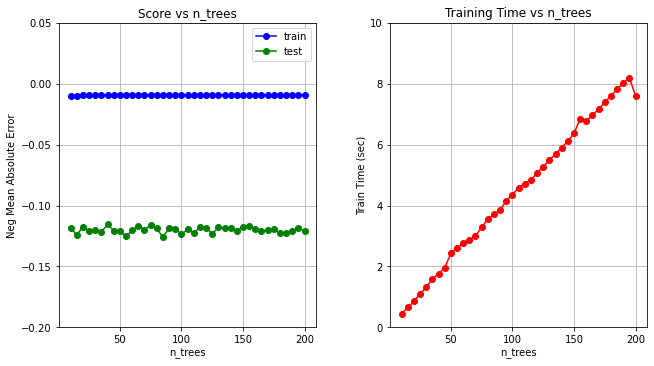

In [495]:
plot_results(tree_grid_search)

In [496]:
RFR_final = rf_random
RFR_predict = RFR_final.predict(X_test)

In [497]:
#measure model performance
model_metrics(y_test, RFR_predict)

Mean Absolute Error: 0.6591458955983467
Mean Squared Error: 0.7015488159631239
Root Mean Squared Error: 0.8375851096832632
Coefficient of Determination: 0.8342283708194752
Akaike Information Criterion: -1214.446
Bayesian Information Criterion: -1202.853


<Figure size 640x480 with 0 Axes>

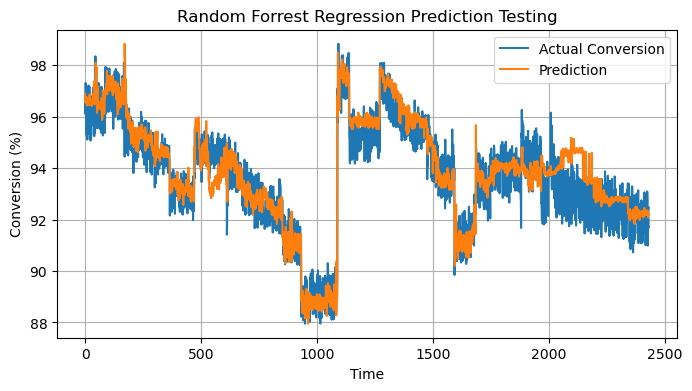

In [498]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(8,4))
    plt.plot(return_conversion_scale(y_test), label = "Actual Conversion")
    plt.plot(return_conversion_scale(RFR_predict), label = "Prediction")
    plt.grid()
    plt.title('Random Forrest Regression Prediction Testing')
    plt.xlabel('Time')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

# MACHINE LEARNING MODEL : SUPPORT VECTOR REGRESSION

In [368]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#Fit SVR base model
svr_rbf = SVR()
svr_rbf.fit(X_train, y_train)

SVR()

In [369]:
#Predict SVR base model
svr_pred = svr_rbf.predict(X_val)
svr_pred

array([0.52184428, 0.56378602, 0.60426512, ..., 0.78867854, 0.78524631,
       0.78843554])

In [370]:
#Evaluating SVR performance
model_metrics(y_val, svr_pred)

Mean Absolute Error: 0.6478085658681936
Mean Squared Error: 0.671864083515352
Root Mean Squared Error: 0.8196731565174938
Coefficient of Determination: 0.9516225149239241
Akaike Information Criterion: -1429.121
Bayesian Information Criterion: -1417.643


<Figure size 640x480 with 0 Axes>

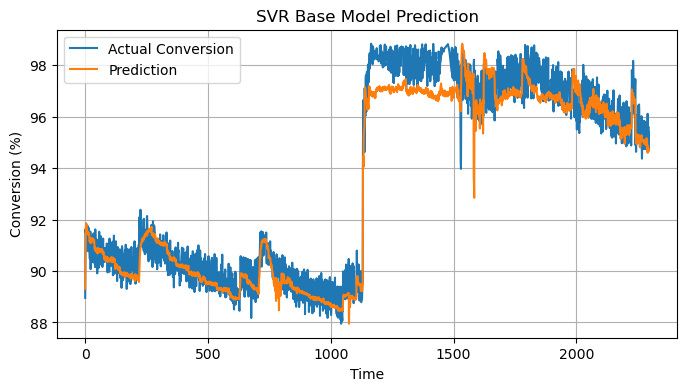

In [371]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(8,4))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(svr_pred), label = "Prediction")
    plt.grid()
    plt.title('SVR Base Model Prediction')
    plt.xlabel('Time')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [372]:
#Set parameter for grid search : 1st round
kernel = ['poly', 'rbf', 'sigmoid']
degree = [2, 3, 4, 5]

# Create the random grid
param_grid = {'kernel': kernel,
               'degree': degree}

print(param_grid)

{'kernel': ['poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4, 5]}


In [373]:
#Use the random grid to search for best hyperparameters

# Create the grid search model and fit to the training data
svr_grid_first = GridSearchCV(SVR(), param_grid=param_grid, verbose = 3, n_jobs=-1, cv = ts_split,
                                scoring = 'neg_mean_absolute_error')
svr_grid_first.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.8min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=SVR(), n_jobs=-1,
             param_grid={'degree': [2, 3, 4, 5],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_absolute_error', verbose=3)

In [374]:
svr_grid_first.best_params_

{'degree': 2, 'kernel': 'rbf'}

In [375]:
best_grid_first = svr_grid_first.best_estimator_

In [440]:
#Grid search to find best hyperparameters : 2nd round
gamma = ['scale', 'auto']
C = [0.001, 0.01, 0.1, 1, 10]
epsilon = [0.0001, 0.001, 0.01, 0.1]

# Create the random grid
param_grid_final = {'C': C,
               'epsilon': epsilon}

# Create the grid search model and fit to the training data
svr_grid_final = GridSearchCV(best_grid_first, param_grid=param_grid_final, verbose = 3, n_jobs=-1, cv = ts_split,
                                scoring = 'r2')
svr_grid_final.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.7min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=SVR(degree=2), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'epsilon': [0.0001, 0.001, 0.01, 0.1]},
             scoring='r2', verbose=3)

In [441]:
svr_grid_final.best_params_

{'C': 0.1, 'epsilon': 0.01}

In [442]:
#Predict hyper parameter tuned SVR
best_svr_pred = svr_grid_final.predict(X_val)

In [443]:
#Evaluating hyper parameter tuned SVR performance

model_metrics(y_val, best_svr_pred)

Mean Absolute Error: 0.600603998523617
Mean Squared Error: 0.55436120425539
Root Mean Squared Error: 0.7445543662187403
Coefficient of Determination: 0.9600832943096179
Akaike Information Criterion: -2379.302
Bayesian Information Criterion: -2367.825


<Figure size 640x480 with 0 Axes>

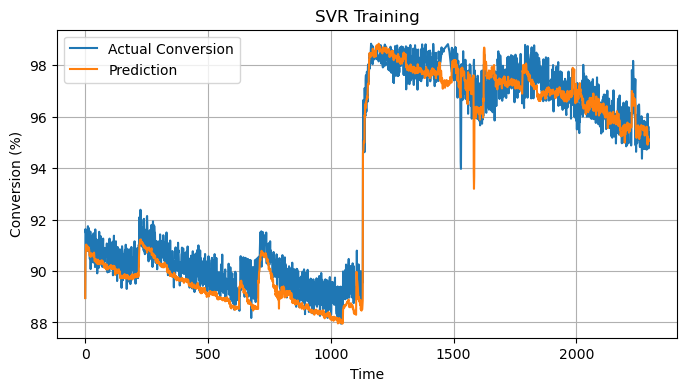

In [444]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(8,4))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(best_svr_pred), label = "Prediction")
    plt.grid()
    plt.title('SVR Training')
    plt.xlabel('Time')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [445]:
#Testing the final model 
svr_predict = svr_grid_final.predict(X_test)

In [446]:
#Evaluating final model SVR performance

model_metrics(y_test, SVR_predict)

Mean Absolute Error: 1.1347555955733963
Mean Squared Error: 1.9575521894573953
Root Mean Squared Error: 1.3991255088294958
Coefficient of Determination: 0.5374425723935468
Akaike Information Criterion: 1571.814
Bayesian Information Criterion: 1583.407


<Figure size 640x480 with 0 Axes>

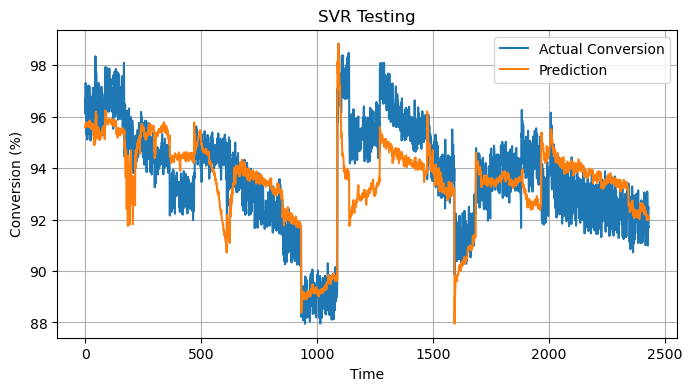

In [435]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(8,4))
    plt.plot(return_conversion_scale(y_test), label = "Actual Conversion")
    plt.plot(return_conversion_scale(SVR_predict), label = "Prediction")
    plt.grid()
    plt.title('SVR Testing')
    plt.xlabel('Time')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

# RNN - LSTM

In [43]:
#Import RNN-LSTM library
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import GridSearchCV

In [44]:
#Reshape data into 3D input
X_train_adj = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])) #reshape (adjust) train shape to 3 dimensional
X_val_adj  = X_val.reshape((X_val.shape[0], 1, X_val.shape[1])) #reshape (adjust) test shape to 3 dimensional
print(X_train_adj.shape, X_val_adj.shape, y_train.shape, y_val.shape )

(11485, 1, 11) (2296, 1, 11) (11485,) (2296,)


In [45]:
#Build the model
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
model_lstm.add(tf.keras.layers.LSTM(units=30))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.Dense(units=1))
model_lstm.compile(loss = 'mse', optimizer = 'adam')
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 75)             26100     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                12720     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 38,851
Trainable params: 38,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
#Fit the model
history_lstm = model_lstm.fit(X_train_adj, y_train, epochs = 100, batch_size=10, validation_data = (X_val_adj, y_val), shuffle=False)

Epoch 1/100
1149/1149 [==============================] - 6s 5ms/step - loss: 0.0192 - val_loss: 0.0563
Epoch 2/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0146 - val_loss: 0.0440
Epoch 3/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0112 - val_loss: 0.0317
Epoch 4/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0100 - val_loss: 0.0267
Epoch 5/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0096 - val_loss: 0.0224
Epoch 6/100
1149/1149 [==============================] - 5s 5ms/step - loss: 0.0093 - val_loss: 0.0187
Epoch 7/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0093 - val_loss: 0.0165
Epoch 8/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0091 - val_loss: 0.0153
Epoch 9/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0089 - val_loss: 0.0147
Epoch 10/100
1149/1149 [==============================] - 5s 4ms/step - l

Epoch 80/100
1149/1149 [==============================] - 5s 5ms/step - loss: 0.0051 - val_loss: 0.0073
Epoch 81/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0050 - val_loss: 0.0068
Epoch 82/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0050 - val_loss: 0.0063
Epoch 83/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0050 - val_loss: 0.0066
Epoch 84/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0050 - val_loss: 0.0070
Epoch 85/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0050 - val_loss: 0.0072
Epoch 86/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0049 - val_loss: 0.0067
Epoch 87/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0049 - val_loss: 0.0068
Epoch 88/100
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0049 - val_loss: 0.0067
Epoch 89/100
1149/1149 [==============================] - 5s 5ms

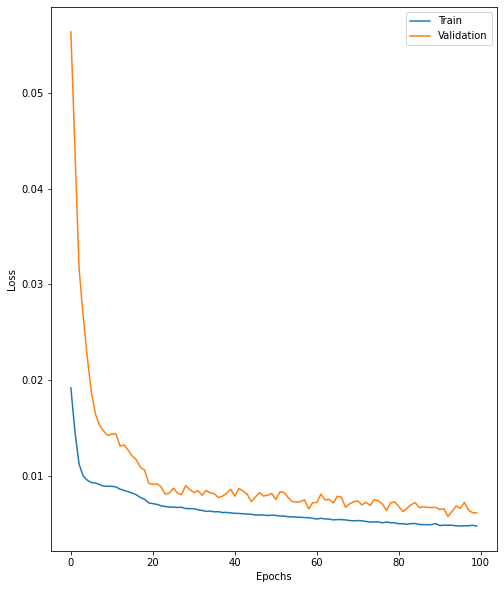

In [47]:
# plot history
plt.plot(history_lstm.history['loss'], label='train')
plt.plot(history_lstm.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [48]:
lstm_first_pred = model_lstm(X_val_adj)

In [49]:
#Convert Tensor value to array
lstm_first_pred_a = lstm_first_pred.numpy()

In [50]:
model_metrics(y_val, lstm_first_pred_a)

Mean Absolute Error: 1.1105254079119953
Mean Squared Error: 2.2865016324119902
Root Mean Squared Error: 1.5121182600616891
Coefficient of Determination: 0.835360750317729
Akaike Information Criterion: 255.165
Bayesian Information Criterion: 266.642


<Figure size 640x480 with 0 Axes>

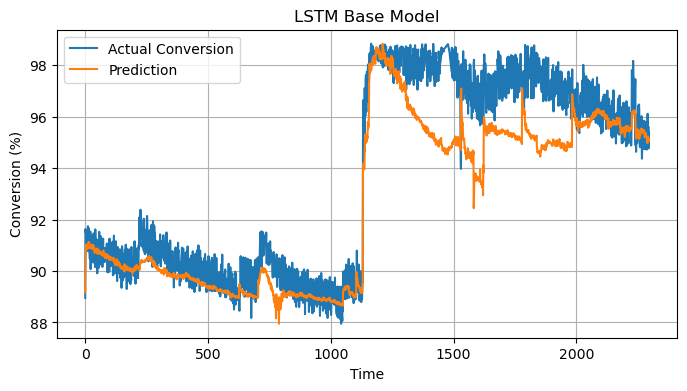

In [367]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(8,4))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(lstm_first_pred), label = "Prediction")
    plt.grid()
    plt.title('LSTM Base Model')
    plt.xlabel('Time')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [52]:
#LSTM hyperparameter tuning 1st step : batch_size and epochs
#Create LSTM function model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=1))
    
    model.compile(loss = 'mse', optimizer = 'adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    model.summary()
    return model

In [53]:
model_tuning = KerasRegressor(build_fn=create_model, verbose=0)

In [54]:
# define the grid search parameters
batch_size = [32, 64, 128, 256]
epochs = [10, 20, 50, 100, 1000]

param_grid = dict(batch_size=batch_size, epochs=epochs)
lstm_grid = GridSearchCV(estimator=model_tuning, param_grid=param_grid, n_jobs=-1, cv=ts_split)
grid_result = lstm_grid.fit(X_train_adj, y_train)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 75)             26100     
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                12720     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 38,851
Trainable params: 38,851
Non-trainable params: 0
_________________________________________________________________


In [55]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.023968 using {'batch_size': 256, 'epochs': 10}
-0.036216 (0.025410) with: {'batch_size': 32, 'epochs': 10}
-0.031911 (0.015295) with: {'batch_size': 32, 'epochs': 20}
-0.034195 (0.023400) with: {'batch_size': 32, 'epochs': 50}
-0.034890 (0.019944) with: {'batch_size': 32, 'epochs': 100}
-0.033814 (0.031731) with: {'batch_size': 32, 'epochs': 1000}
-0.038603 (0.026051) with: {'batch_size': 64, 'epochs': 10}
-0.037716 (0.019981) with: {'batch_size': 64, 'epochs': 20}
-0.035563 (0.017837) with: {'batch_size': 64, 'epochs': 50}
-0.033232 (0.019470) with: {'batch_size': 64, 'epochs': 100}
-0.034849 (0.024107) with: {'batch_size': 64, 'epochs': 1000}
-0.026448 (0.012800) with: {'batch_size': 128, 'epochs': 10}
-0.032332 (0.012393) with: {'batch_size': 128, 'epochs': 20}
-0.039214 (0.019968) with: {'batch_size': 128, 'epochs': 50}
-0.030203 (0.016913) with: {'batch_size': 128, 'epochs': 100}
-0.045699 (0.049691) with: {'batch_size': 128, 'epochs': 1000}
-0.023968 (0.012023) with: {'b

In [59]:
pd.DataFrame(grid_result.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,17.083494,4.185313,3.824104,2.136743,32,10,"{'batch_size': 32, 'epochs': 10}",-0.026541,-0.035026,-0.083481,-0.028895,-0.007135,-0.036216,0.025410,14
1,30.305054,11.067408,3.271108,2.262250,32,20,"{'batch_size': 32, 'epochs': 20}",-0.030721,-0.043316,-0.053843,-0.020334,-0.011339,-0.031911,0.015295,5
2,66.290044,25.933523,7.105976,2.603567,32,50,"{'batch_size': 32, 'epochs': 50}",-0.068313,-0.054983,-0.025441,-0.011350,-0.010890,-0.034195,0.023400,10
3,130.931164,52.018029,8.239760,2.624525,32,100,"{'batch_size': 32, 'epochs': 100}",-0.043231,-0.064585,-0.041426,-0.011744,-0.013465,-0.034890,0.019944,12
4,1158.937437,465.267881,17.927047,11.473103,32,1000,"{'batch_size': 32, 'epochs': 1000}",-0.005856,-0.033527,-0.094679,-0.020345,-0.014665,-0.033814,0.031731,8


In [64]:
lstm_grid.best_params_

{'batch_size': 256, 'epochs': 10}

In [118]:
#LSTM hyperparameter tuning 2nd step : lerning rate
# fit a model and plot learning curve
def fit_model(lrate):
    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(lr=lrate)
    model.compile(loss = 'mse', optimizer = opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.summary() 
    
    # fit model
    history2 = model.fit(X_train_adj, y_train, epochs =lstm_grid.best_params_['epochs'], 
                                  batch_size=lstm_grid.best_params_['batch_size'], validation_data = (X_val_adj, y_val), 
                                  verbose=0)
    
    # plot learning curves
    plt.plot(history2.history['loss'], label='train')
    plt.plot(history2.history['val_loss'], label='test')
    plt.title('lrate='+str(lrate), pad=-50)
    plt.legend(['train', 'test'])
    plt.ylabel('Loss')
    
    return(model)

In [108]:
#Define learning rate parameter
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_146 (LSTM)              (None, 1, 75)             26100     
_________________________________________________________________
lstm_147 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_73 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 31        
Total params: 38,851
Trainable params: 38,851
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_148 (LSTM)              (None, 1, 75)             26100     
__________________________

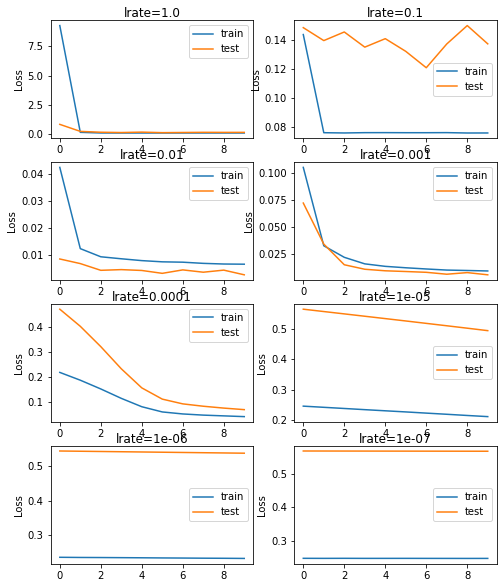

In [109]:
for i in range(len(learning_rates)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    fit_model(learning_rates[i])
# show learning curves
plt.show()

In [350]:
#Define final LSTM model
def final_model():
    # define model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(75, return_sequences = True, input_shape = (X_train_adj.shape[1], X_train_adj.shape[2])))
    model.add(tf.keras.layers.LSTM(units=30))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(units=1))
    
    # compile model
    opt = tf.keras.optimizers.Adam(lr=0.01)
    model.compile(loss = 'mse', optimizer = opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    
    model.summary() 
    
    # fit model
    history = model.fit(X_train_adj, y_train, epochs =lstm_grid.best_params_['epochs'], 
                                  batch_size=lstm_grid.best_params_['batch_size'], validation_data = (X_val_adj, y_val), 
                                  verbose=0)
    
    return(model)

In [365]:
#predict taeget for validation
final_pred = final_model().predict(X_val_adj)
model_metrics(y_val, final_pred)

Model: "sequential_188"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_372 (LSTM)              (None, 1, 75)             26100     
_________________________________________________________________
lstm_373 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_184 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_184 (Dense)            (None, 1)                 31        
Total params: 38,851
Trainable params: 38,851
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 0.8873518923628809
Mean Squared Error: 1.40785921511253
Root Mean Squared Error: 1.186532433232455
Coefficient of Determination: 0.8986272821551027
Akaike Information Criterion: -611.879
Bayesian Information Criterion: -600.4

<Figure size 640x480 with 0 Axes>

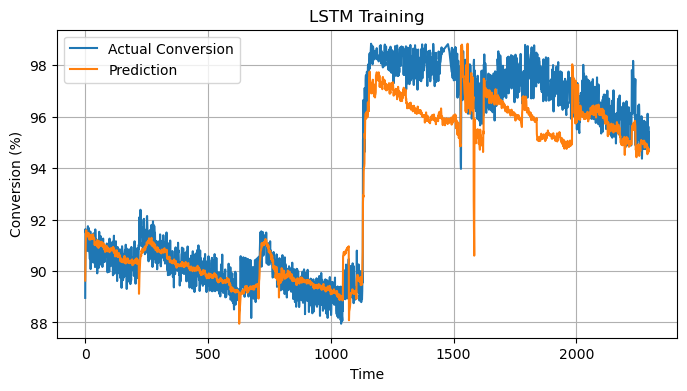

In [366]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(8,4))
    plt.plot(return_conversion_scale(y_val), label = "Actual Conversion")
    plt.plot(return_conversion_scale(final_pred), label = "Prediction")
    plt.grid()
    plt.title('LSTM Training')
    plt.xlabel('Time')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()

In [363]:
#Now predict with test data
#reshape testing data into 3 dimension
X_test_adj = X_test.reshape((X_test.shape[0], 1, X_test.shape[1])) 

#Predict test data
test_pred = final_model().predict(X_test_adj)

#Measure performance metrics
model_metrics(y_test, test_pred)

Model: "sequential_187"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_370 (LSTM)              (None, 1, 75)             26100     
_________________________________________________________________
lstm_371 (LSTM)              (None, 30)                12720     
_________________________________________________________________
dropout_183 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_183 (Dense)            (None, 1)                 31        
Total params: 38,851
Trainable params: 38,851
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 1.088315107190371
Mean Squared Error: 1.9157621802727558
Root Mean Squared Error: 1.384110609840397
Coefficient of Determination: 0.5473172920828618
Akaike Information Criterion: 884.527
Bayesian Information Criterion: 896.12

<Figure size 640x480 with 0 Axes>

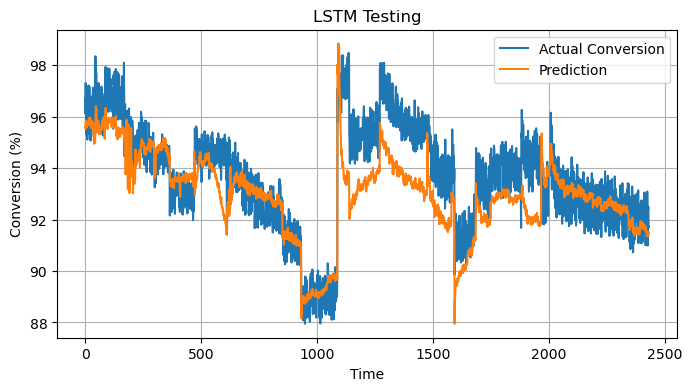

In [364]:
#Plot actual vs prediction
with plt.style.context('default'):
    plt.figure()
    plt.subplots(figsize=(8,4))
    plt.plot(return_conversion_scale(y_test), label = "Actual Conversion")
    plt.plot(return_conversion_scale(test_pred), label = "Prediction")
    plt.grid()
    plt.title('LSTM Testing')
    plt.xlabel('Time')
    plt.ylabel('Conversion (%)')
    plt.legend(loc='best')
    plt.show()